In [137]:
import tensorflow as tf 
import os
from random import shuffle
import numpy as np
import os.path
from pathlib import Path
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sb
from PIL import Image

In [94]:
os.chdir('/data')
working_directory = os.getcwd()
print("working directory:", working_directory)

working directory: /data


# 1. Loading Data and Preprocessing

In [169]:
def make_image_df(folder):
    test_image_dir = Path('fish_data/'+folder)
    test_filepaths = list(test_image_dir.glob(r'*/*.*'))
    test_labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1], test_filepaths))

    test_filepaths = pd.Series(test_filepaths, name='Filepath').astype(str)
    test_labels = pd.Series(test_labels, name='Label')
    test_image_df = pd.concat([test_filepaths, test_labels], axis=1)
    return test_image_df

test_df = make_image_df('Test')
dev_df = make_image_df('Train_Val')
total_df = pd.concat([dev_df, test_df], axis=0, ignore_index=True)
total_df = total_df.sample(frac = 1, ignore_index=True)

In [170]:
print(test_df.head())
test_df.shape

                                            Filepath            Label
0           fish_data/Test/Black Sea Sprat/00023.png  Black Sea Sprat
1           fish_data/Test/Black Sea Sprat/00005.png  Black Sea Sprat
2           fish_data/Test/Black Sea Sprat/00003.png  Black Sea Sprat
3           fish_data/Test/Black Sea Sprat/00009.png  Black Sea Sprat
4  fish_data/Test/Black Sea Sprat/.ipynb_checkpoints  Black Sea Sprat


(438, 2)

In [171]:
print(dev_df.head())
dev_df.shape

                                        Filepath            Label
0  fish_data/Train_Val/Black Sea Sprat/00124.png  Black Sea Sprat
1  fish_data/Train_Val/Black Sea Sprat/00960.png  Black Sea Sprat
2  fish_data/Train_Val/Black Sea Sprat/00612.png  Black Sea Sprat
3  fish_data/Train_Val/Black Sea Sprat/00365.png  Black Sea Sprat
4  fish_data/Train_Val/Black Sea Sprat/00681.png  Black Sea Sprat


(9009, 2)

In [172]:
print(total_df.head())
print(total_df.shape)

                                           Filepath               Label
0      fish_data/Train_Val/Horse Mackerel/00073.png      Horse Mackerel
1            fish_data/Train_Val/Sea Bass/00046.png            Sea Bass
2  fish_data/Train_Val/Striped Red Mullet/00982.png  Striped Red Mullet
3     fish_data/Train_Val/Black Sea Sprat/00362.png     Black Sea Sprat
4     fish_data/Train_Val/Black Sea Sprat/00050.png     Black Sea Sprat
(9447, 2)


In [173]:
dev_df, test_df = train_test_split(total_df, test_size=0.1, train_size=0.9, shuffle=True, random_state=42)
train_df, val_df = train_test_split(dev_df, test_size=0.2, train_size=0.8, shuffle=True, random_state=42)

In [174]:
image_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255 # Could apply additional augmentation here
)

In [175]:
train_images = image_generator.flow_from_dataframe(
    dataframe = train_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=42
)

val_images = image_generator.flow_from_dataframe(
    dataframe = val_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=42
)

test_images = image_generator.flow_from_dataframe(
    dataframe = test_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=42
)

Found 6792 validated image filenames belonging to 9 classes.
Found 1695 validated image filenames belonging to 9 classes.
Found 943 validated image filenames belonging to 9 classes.


/root/yes/envs/tensorflow/lib/python3.9/site-packages/keras_preprocessing/image/dataframe_iterator.py:279: UserWarning: Found 9 invalid image filename(s) in x_col="Filepath". These filename(s) will be ignored.
  warnings.warn(
/root/yes/envs/tensorflow/lib/python3.9/site-packages/keras_preprocessing/image/dataframe_iterator.py:279: UserWarning: Found 6 invalid image filename(s) in x_col="Filepath". These filename(s) will be ignored.
  warnings.warn(
/root/yes/envs/tensorflow/lib/python3.9/site-packages/keras_preprocessing/image/dataframe_iterator.py:279: UserWarning: Found 2 invalid image filename(s) in x_col="Filepath". These filename(s) will be ignored.
  warnings.warn(


In [176]:
print("Training image shape:", train_images.image_shape)
print("Validation image shape:", val_images.image_shape)
print("Test image shape:", test_images.image_shape)

Training image shape: (224, 224, 3)
Validation image shape: (224, 224, 3)
Test image shape: (224, 224, 3)


In [177]:
train_images.class_indices

{'Black Sea Sprat': 0,
 'Gilt Head Bream': 1,
 'Horse Mackerel': 2,
 'Red Mullet': 3,
 'Red Sea Bream': 4,
 'Sea Bass': 5,
 'Shrimp': 6,
 'Striped Red Mullet': 7,
 'Trout': 8}

In [178]:
val_images.class_indices

{'Black Sea Sprat': 0,
 'Gilt Head Bream': 1,
 'Horse Mackerel': 2,
 'Red Mullet': 3,
 'Red Sea Bream': 4,
 'Sea Bass': 5,
 'Shrimp': 6,
 'Striped Red Mullet': 7,
 'Trout': 8}

In [179]:
test_images.class_indices

{'Black Sea Sprat': 0,
 'Gilt Head Bream': 1,
 'Horse Mackerel': 2,
 'Red Mullet': 3,
 'Red Sea Bream': 4,
 'Sea Bass': 5,
 'Shrimp': 6,
 'Striped Red Mullet': 7,
 'Trout': 8}

## 1.1 Visualizing Data

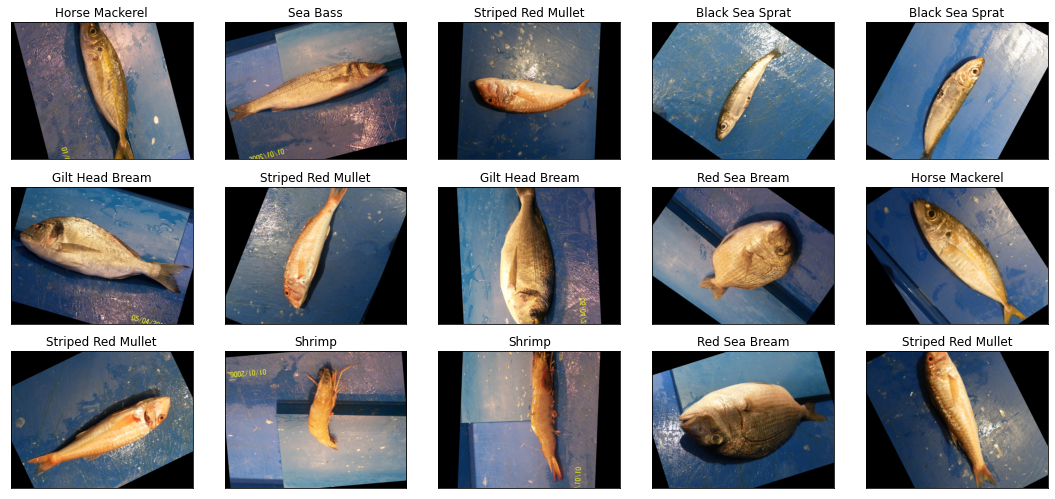

In [183]:
# Display 20 picture of the dataset with their labels
fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(15, 7),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(mpimg.imread(total_df.loc[i, 'Filepath']))
    ax.set_title(total_df.loc[i, 'Label'])
    
plt.tight_layout()
plt.show();

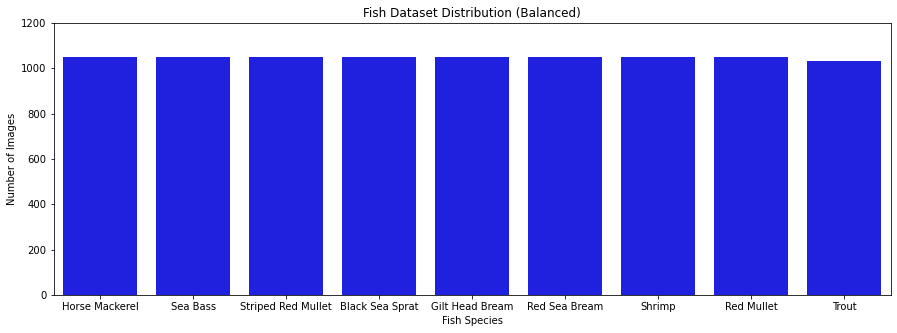

In [201]:
plt.figure(figsize=(15,5))
sb.countplot(x=total_df.Label, color='blue')
plt.ylim(top=1200)
plt.title("Fish Dataset Distribution (Balanced)")
plt.xlabel("Fish Species")
plt.ylabel("Number of Images");

# 2. Defining Model Architecture

In [68]:
import tensorflow.keras
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout, Input, BatchNormalization
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

In [69]:
input = Input(shape =(224,224,3))
l1 = Conv2D(filters=128, kernel_size=(3, 3), activation='relu')(input)
l2 = MaxPool2D(2,2)(l1)
l3 = Dropout(0.2)(l2)

# Regularizing using penalty instead of dropout (want to maintain feature extraction capabilities)
l4 = Conv2D(filters=64, kernel_size=(3,3), activation='relu', kernel_regularizer=tf.keras.regularizers.l2(l2=0.001))(l3) 
l5 = MaxPool2D(2,2)(l4)
l6 = Flatten()(l5)

l7 = Dense(256, activation='relu')(l6)
l8 = Dropout(0.2)(l7) # Only change after 94.9% test accuracy training run
l9 = Dense(256, activation='relu')(l8)
l10 = Dropout(0.2)(l9) # Only change after 94.9% test accuracy training run
output = Dense(9, activation='softmax')(l10)

model = Model (inputs=input, outputs =output)
model.compile(
    optimizer='adam', # Starting learning rate of 0.001 (default parameter)
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 222, 222, 128)     3584      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 111, 111, 128)     0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 111, 111, 128)     0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 109, 109, 64)      73792     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 186624)            0   

# 3. Defining Schedulers and Callbacks

In [70]:
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience = 10) # Fine tune
checkpoint_path = "training_1/cp.ckpt"
monitor = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path, monitor='val_loss',
                                             verbose=1,save_best_only=True,
                                             save_weights_only=True,
                                             mode='min') # Only saves the best model (so far) in terms of min validation loss

def scheduler(epoch, lr):
    if epoch%10 == 0 and epoch!= 0:
        lr = lr/1.2
    return lr

lr_schedule = tf.keras.callbacks.LearningRateScheduler(scheduler,verbose = 0)
lr_schedule_on_plateau = ReduceLROnPlateau(monitor='val_loss', mode='min', factor=0.1, patience=5, min_lr=0.000001, verbose=1)
callbacks = [early_stop, monitor, lr_schedule_on_plateau,lr_schedule]

# 4. Training Model

In [53]:
try:
    history = model.fit(
        train_images, 
        validation_data=val_images, 
        epochs=50, # Fine tune
        callbacks=callbacks
    )
except KeyboardInterrupt:
    print("\nmodel training terminated\n")

Epoch 1/50
213/213 [==============================] - 123s 575ms/step - loss: 2.2015 - accuracy: 0.4024 - val_loss: 0.5507 - val_accuracy: 0.8264

Epoch 00001: val_loss improved from inf to 0.55074, saving model to training_1/cp.ckpt
Epoch 2/50
213/213 [==============================] - 109s 513ms/step - loss: 0.2979 - accuracy: 0.9177 - val_loss: 0.2720 - val_accuracy: 0.9229

Epoch 00002: val_loss improved from 0.55074 to 0.27203, saving model to training_1/cp.ckpt
Epoch 3/50
213/213 [==============================] - 108s 504ms/step - loss: 0.0942 - accuracy: 0.9851 - val_loss: 0.2470 - val_accuracy: 0.9247

Epoch 00003: val_loss improved from 0.27203 to 0.24697, saving model to training_1/cp.ckpt
Epoch 4/50
213/213 [==============================] - 107s 503ms/step - loss: 0.0766 - accuracy: 0.9891 - val_loss: 0.2086 - val_accuracy: 0.9453

Epoch 00004: val_loss improved from 0.24697 to 0.20862, saving model to training_1/cp.ckpt
Epoch 5/50
213/213 [==============================] 

In [ ]:
np.save('history.npy', history.history)

NameError: name 'history' is not defined

# 5. Loading/Saving Best Model and Testing

In [71]:
model.load_weights(checkpoint_path)

In [72]:
model.save('Model')

2022-03-22 17:17:32.889242: W tensorflow/python/util/util.cc:348] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: Model/assets


In [73]:
history=np.load('history.npy', allow_pickle='TRUE').item() # Get standard scalar object
print("All training results", history)

All training results {'loss': [1.2918709516525269, 0.30588680505752563, 0.1398799866437912, 0.0918986052274704, 0.0747467502951622, 0.05734184756875038, 0.05725032091140747, 0.072073794901371, 0.046092379838228226, 0.04909295216202736, 0.027461392804980278, 0.024308525025844574, 0.020618436858057976, 0.01864658296108246, 0.017741279676556587, 0.01764005608856678, 0.01673857495188713, 0.016180915758013725, 0.01548372209072113, 0.015170665457844734, 0.015041062608361244, 0.014333194121718407, 0.013551276177167892, 0.013165684416890144, 0.013172327540814877, 0.012194763869047165, 0.012850886210799217, 0.011144140735268593, 0.010956073179841042, 0.010202297009527683, 0.01004001498222351, 0.00980854406952858, 0.009938756003975868, 0.009602274745702744, 0.009361282922327518, 0.0092219989746809], 'accuracy': [0.5773195624351501, 0.9141384363174438, 0.9702503681182861, 0.9846833348274231, 0.9883652329444885, 0.9924889802932739, 0.9929307699203491, 0.9865979552268982, 0.9938144087791443, 0.9927

In [74]:
val_loss_indx= np.argmin(history.get('val_loss'))
print("Best Training Results:\n")
print("Training Loss: {}\nValidation Loss: {}\nTraining Accuracy: {}\nValidation Accuracy: {}\n".format(history.get('loss')[val_loss_indx], history.get('val_loss')[val_loss_indx], 
              history.get('accuracy')[val_loss_indx], history.get('val_accuracy')[val_loss_indx]))

Best Training Results:

Training Loss: 0.012194763869047165
Validation Loss: 0.09205737709999084
Training Accuracy: 0.99985271692276
Validation Accuracy: 0.9752795696258545



In [75]:
results = model.evaluate(test_images, verbose=1)

print("Categorical Cross Entropy: {:.5f}".format(results[0]))
print("Test Accuracy: {:.2f}%".format(results[1] * 100))

30/30 [==============================] - 12s 398ms/step - loss: 0.0755 - accuracy: 0.9773
Categorical Cross Entropy: 0.08670
Test Accuracy: 97.45%


# 6. Results of Training and Evaluation